In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings     #To ignore warnings
warnings.filterwarnings("ignore")
twitter_data_full=pd.read_csv("Twitter-data.csv",encoding="ISO-8859–1")


## EXPLORATORY DATA ANALYSIS

In [2]:
twitter_data_full.columns 

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [3]:
#Checking for duplicate rows
twitter_data_full.duplicated().sum()

0

In [4]:
twitter_data_full.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-null  object 
 15  pr

In [5]:
twitter_data_full.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [6]:
pd.options.display.float_format='{:20,.2f}'.format #Change from scientific notation 

In [7]:
#Checking for unique _unit_id
twitter_data_full._unit_id.nunique()

20050

In [8]:
twitter_data_full.describe()

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,"20,050.00","20,050.00","20,024.00","20,050.00","20,050.00","20,050.00","20,050.00","20,050.00"
mean,"815,729,449.31",3.62,0.88,0.99,"4,382.20",0.08,"38,924.69","658,734,998,503,791,744.00"
std,"6,000.80",12.33,0.19,0.05,"12,518.58",2.65,"116,837.13","5,000,124,469,059.97"
min,"815,719,226.00",3.00,0.00,0.63,0.00,0.00,1.00,"658,730,000,000,000,000.00"
25%,"815,724,318.25",3.00,0.68,1.00,11.00,0.00,"2,398.00","658,730,000,000,000,000.00"
50%,"815,729,383.50",3.00,1.00,1.00,456.00,0.00,"11,441.50","658,730,000,000,000,000.00"
75%,"815,734,513.75",3.00,1.00,1.00,"3,315.50",0.00,"40,027.50","658,740,000,000,000,000.00"
max,"815,757,985.00",274.00,1.00,1.00,"341,621.00",330.00,"2,680,199.00","658,740,000,000,000,000.00"


In [9]:
twitter_data_full.gender.value_counts() 

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [10]:
#Separating into male and female data
female_data_full=twitter_data_full.loc[twitter_data_full["gender"]=="female"]
male_data_full=twitter_data_full.loc[twitter_data_full["gender"]=="male"]

In [11]:
#To See Distribution Link color in female gender
link_female=pd.Series(female_data_full.link_color.value_counts())[:10]

Text(0, 0.5, 'Frequency')

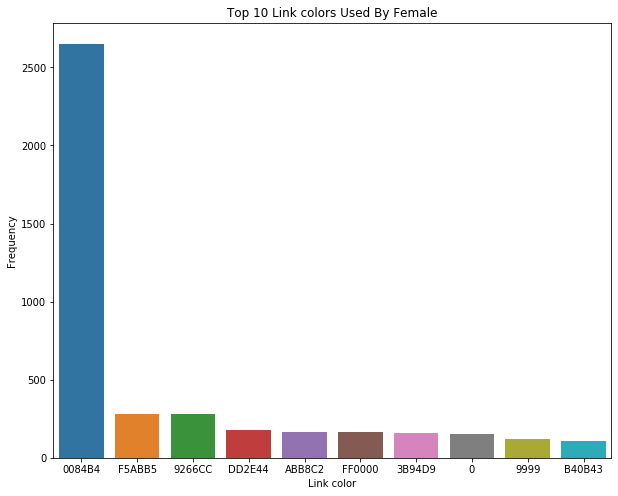

In [12]:
plt.figure(figsize=(10,8))
sb.barplot(x=link_female.index,y=link_female.values)
plt.title("Top 10 Link colors Used By Female")
plt.xlabel("Link color")
plt.ylabel("Frequency")

In [13]:
#To see distribution of link color in male gender
link_male=pd.Series(male_data_full.link_color.value_counts())[:10]


Text(0, 0.5, 'Frequency')

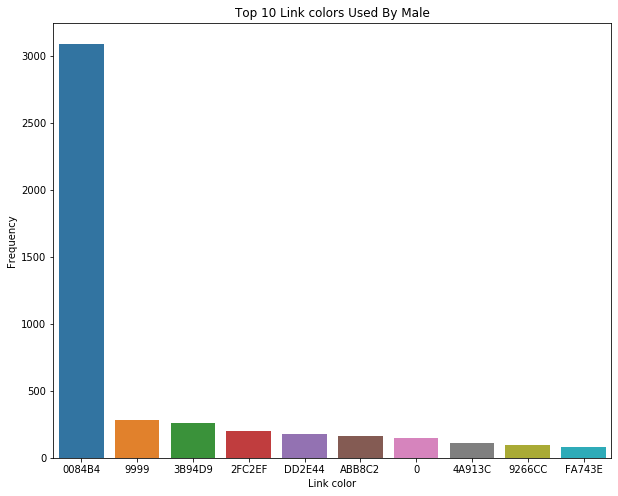

In [14]:
plt.figure(figsize=(10,8))
sb.barplot(x=link_male.index,y=link_male.values)
plt.title("Top 10 Link colors Used By Male")
plt.xlabel("Link color")
plt.ylabel("Frequency")

In [15]:
#To see distribuition of side-bar color in female gender
sidebar_female=pd.Series(female_data_full.sidebar_color.value_counts())[:10]


Text(0, 0.5, 'Frequency')

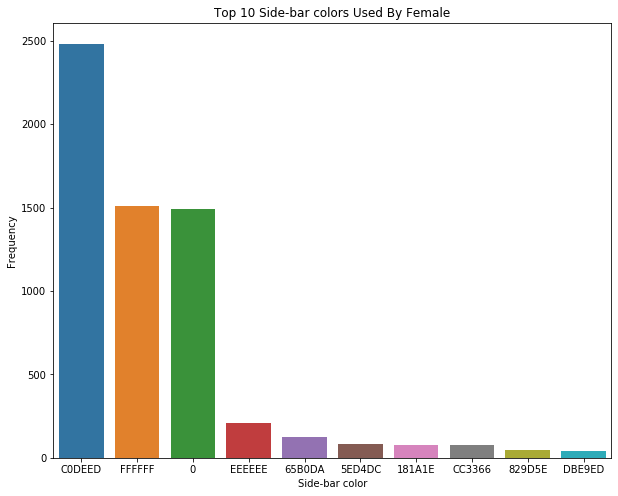

In [16]:
plt.figure(figsize=(10,8))
sb.barplot(x=sidebar_female.index,y=sidebar_female.values)
plt.title("Top 10 Side-bar colors Used By Female")
plt.xlabel("Side-bar color")
plt.ylabel("Frequency")

In [17]:
#to see the distribution of sidebar color in male gender
sidebar_male=pd.Series(male_data_full.sidebar_color.value_counts())[:10]


Text(0, 0.5, 'Frequency')

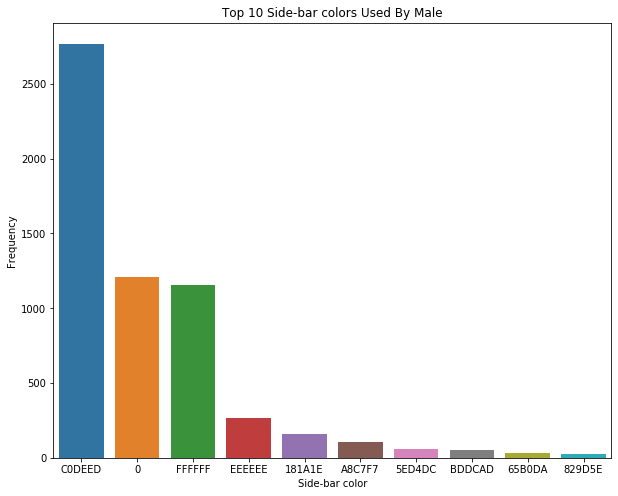

In [18]:
plt.figure(figsize=(10,8))
sb.barplot(x=sidebar_male.index,y=sidebar_male.values)
plt.title("Top 10 Side-bar colors Used By Male")
plt.xlabel("Side-bar color")
plt.ylabel("Frequency")

In [19]:
#Selecting columns with data we need
twitter_data=twitter_data_full[["text","description","gender:confidence","gender"]]

In [20]:
twitter_data.head()

,text,description,gender:confidence,gender
0,Robbie E Responds To Critics After Win Against...,i sing my own rhythm.,1.00,male
1,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...,1.00,male
2,i absolutely adore when louis starts the songs...,louis whining and squealing and all,0.66,male
3,Hi @JordanSpieth - Looking at the url - do you...,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",1.00,male
4,Watching Neighbours on Sky+ catching up with t...,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,1.00,female


In [21]:
#Finding data with 100% gender confidence
full_confidence=(twitter_data["gender:confidence"]==1).sum()

In [22]:
print("Fraction of data having 100% gender confidence= {:.2f}".format(full_confidence/len(twitter_data)))

Fraction of data having 100% gender confidence= 0.69


In [23]:
#Taking only rows with 100% gender confidence and then dropping the gender confidence column
twitter_data=twitter_data.loc[twitter_data["gender:confidence"]==1].drop("gender:confidence", axis=1)

In [24]:
len(twitter_data)

13926

In [25]:
gender_count=twitter_data.gender.value_counts() 

Text(0, 0.5, 'Frequency')

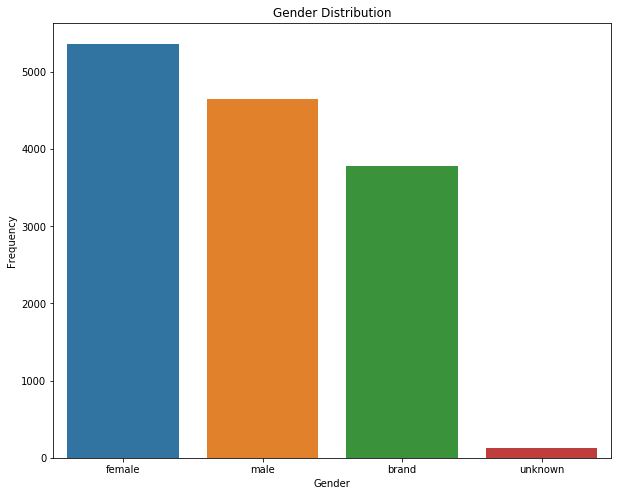

In [26]:
plt.figure(figsize=(10,8))

sb.barplot(x=gender_count.index,y=gender_count.values)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Frequency")



In [27]:
twitter_data.gender.value_counts()

female     5367
male       4653
brand      3784
unknown     122
Name: gender, dtype: int64

In [28]:
twitter_data=twitter_data.loc[twitter_data["gender"]!="unknown"] #Droping rows with gender given as "unknown"

In [29]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 20049
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         13804 non-null  object
 1   description  11773 non-null  object
 2   gender       13804 non-null  object
dtypes: object(3)
memory usage: 431.4+ KB


In [30]:
#Fill the missing values in description with "None"
twitter_data["description"]=twitter_data.description.fillna("None")

In [31]:
#Checking for missing values
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 0 to 20049
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         13804 non-null  object
 1   description  13804 non-null  object
 2   gender       13804 non-null  object
dtypes: object(3)
memory usage: 431.4+ KB


In [32]:
import re
import nltk


In [33]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords_list=stopwords.words("English") #Making list of stopwords


In [34]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
#Function for cleaning "text"
def cleaning(text):
    text=re.sub("<[^>]*>"," ",text) #remove html
    text=re.sub("https?://[A-Za-z0-9./]+"," ",text) #remove url
    text=re.sub("_+"," ",text)#remove underscore 
    text=re.sub("[^a-zA-z]"," ",text) #remove symbols and digits
    text=text.lower() #converting to lowercase
    word_list=word_tokenize(text)
    clean_words=[word for word in word_list if not word in stopwords_list ] #removing stopwords 
    text=" ".join(clean_words) #returns clean text
    return text

In [36]:
#Cleaning "text" and "description" columns
twitter_data["clean_text"]=twitter_data["text"].apply(lambda x: cleaning(x))
twitter_data["clean_description"]=twitter_data.description.apply(lambda x: cleaning(x))   


In [37]:
twitter_data

,text,description,gender,clean_text,clean_description
0,Robbie E Responds To Critics After Win Against...,i sing my own rhythm.,male,robbie e responds critics win eddie edwards wo...,sing rhythm
1,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...,male,felt like friends living story retired ian,author novels filled family drama romance
3,Hi @JordanSpieth - Looking at the url - do you...,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",male,hi jordanspieth looking url use ifttt typicall...,mobile guy ers shazam google kleiner perkins y...
4,Watching Neighbours on Sky+ catching up with t...,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,female,watching neighbours sky catching neighbs xxx xxx,ricky wilson best frontman kaiser chiefs best ...
5,"Ive seen people on the train with lamps, chair...",you don't know me.,female,ive seen people train lamps chairs tvs etc,know
...,...,...,...,...,...
20044,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,I Love Me...Myself....&....I,female,need ride home practice raining hard asf,love
20045,"@lookupondeath ...Fine, and I'll drink tea too...",(rp),female,lookupondeath fine drink tea love,rp
20046,Greg Hardy you a good player and all but don't...,"Whatever you like, it's not a problem at all. ...",male,greg hardy good player get face dez bryant lea...,whatever like problem chargernation foreverroy...
20047,You can miss people and still never want to se...,#TeamBarcelona ..You look lost so you should f...,male,miss people still never want see,teambarcelona look lost follow follow heart br...


# Which gender makes more typos in their tweets?


In [38]:
#separating the data into male and female data
female_data=twitter_data.loc[twitter_data.gender=="female"]
male_data=twitter_data.loc[twitter_data.gender=="male"]

In [39]:
from spellchecker import SpellChecker


spell=SpellChecker() #for checking spellings/typos

In [40]:
#function for finding typo count in "text"
def find_typos(text):
    text=re.sub("<[^>]*>"," ",text) #remove html
    text=re.sub("https?://[A-Za-z0-9./]+"," ",text) #remove url
    text=re.sub("@[A-Za-z0-9_]+"," ",text)#remove tags          #To avoid counting tags and hashtags as a typo
    text=re.sub("#[A-Za-z0-9_]+"," ",text) #remove hashtags
    text=re.sub("_+"," ",text)#remove underscore 
    text=re.sub("[^a-zA-z]"," ",text) #remove symbols and digits
    text=text.lower() #converting to lowercase
    word_list=text.split() #splitting the text
    typolist=[typo for typo in spell.unknown(word_list) if not typo ==set()]  #list of typos
    return len(typolist) #returns no. of typos in "text" 

In [41]:
#New column that gives typo count in the "text"
female_data["Typo_count"]=female_data.text.apply(lambda x:find_typos(x))
female_data

,text,description,gender,clean_text,clean_description,Typo_count
4,Watching Neighbours on Sky+ catching up with t...,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,female,watching neighbours sky catching neighbs xxx xxx,ricky wilson best frontman kaiser chiefs best ...,1
5,"Ive seen people on the train with lamps, chair...",you don't know me.,female,ive seen people train lamps chairs tvs etc,know,0
8,@_Aphmau_ the pic defines all mcd fangirls/fan...,Pll Fan // Crazy about MCD // Ramen is bae,female,aphmau pic defines mcd fangirls fanboys mcd sh...,pll fan crazy mcd ramen bae,2
9,@Evielady just how lovely is the tree this yea...,"Renaissance art historian, University of Notti...",female,evielady lovely tree year never seen gorgeous ...,renaissance art historian university nottingha...,0
15,https://t.co/EROGWTFTYo It's a glow of satisfa...,None,female,glow satisfaction glow,none,0
...,...,...,...,...,...,...
20035,Beetlejuice is the perfect Halloween movie!!!!...,25. love my friends & family. the color pink. ...,female,beetlejuice perfect halloween movie beetlejuic...,love friends family color pink mkto followed l...,0
20039,Especially when all you do is the best you can...,You can find me where the wild things are,female,especially best still get shit,find wild things,0
20044,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,I Love Me...Myself....&....I,female,need ride home practice raining hard asf,love,1
20045,"@lookupondeath ...Fine, and I'll drink tea too...",(rp),female,lookupondeath fine drink tea love,rp,0


In [42]:
male_data["Typo_count"]=male_data.text.apply(lambda x:find_typos(x))
male_data

,text,description,gender,clean_text,clean_description,Typo_count
0,Robbie E Responds To Critics After Win Against...,i sing my own rhythm.,male,robbie e responds critics win eddie edwards wo...,sing rhythm,0
1,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...,male,felt like friends living story retired ian,author novels filled family drama romance,0
3,Hi @JordanSpieth - Looking at the url - do you...,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",male,hi jordanspieth looking url use ifttt typicall...,mobile guy ers shazam google kleiner perkins y...,1
7,Gala Bingo clubs bought for å£241m: The UK's l...,The secret of getting ahead is getting started.,male,gala bingo clubs bought uk largest high street...,secret getting ahead getting started,0
17,@coolyazzy94 Ditto - I'm still learning the fa...,"Over enthusiastic F1 fan. Model collector, mu...",male,coolyazzy ditto still learning favourites retw...,enthusiastic f fan model collector music fan f...,3
...,...,...,...,...,...,...
20032,@legobutts you can do quests and kill stuff wh...,Amicable IT person. Self indulgent writer. Som...,male,legobutts quests kill stuff wearing mask get c...,amicable person self indulgent writer somehow ...,0
20037,@TrentWalton @oguzbilgic Spell it out in all-c...,"Typographer and typographic consultant, co-fou...",male,trentwalton oguzbilgic spell caps think may ca...,typographer typographic consultant co founder ...,1
20043,"Game faggot and venison loin, crisp spelt and ...","Head Chef, Chez Bruce. Loves Cars and Bicycles...",male,game faggot venison loin crisp spelt quince,head chef chez bruce loves cars bicycles food,0
20046,Greg Hardy you a good player and all but don't...,"Whatever you like, it's not a problem at all. ...",male,greg hardy good player get face dez bryant lea...,whatever like problem chargernation foreverroy...,1


Text(0.5, 1.0, 'Distribution of Typo counts in both genders')

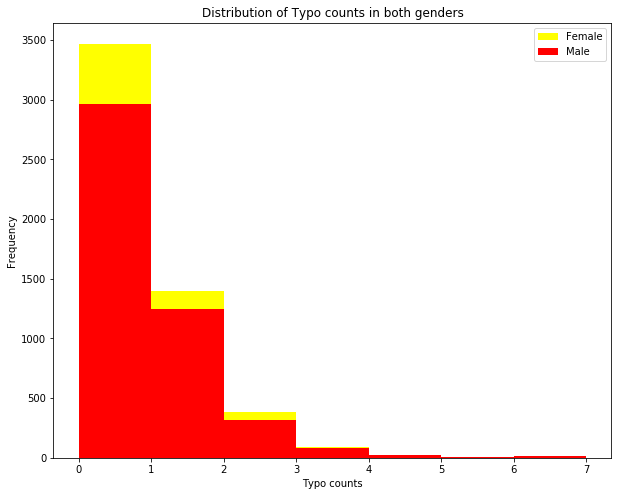

In [43]:
#comparing typos in male and female
import numpy as np
plt.figure(figsize=(10,8))
plt.hist(female_data["Typo_count"],bins=np.arange(0,8),color="yellow",label="Female")
plt.hist(male_data["Typo_count"],bins=np.arange(0,8),color="red",label="Male")
plt.xlabel("Typo counts")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Typo counts in both genders")


In [44]:
print("Total number of typos made by female",female_data.Typo_count.sum())
print("Total number of typos made by male",male_data.Typo_count.sum())
print("Female gender has more typos in their text")

Total number of typos made by female 2578
Total number of typos made by male 2344
Female gender has more typos in their text


### Female gender has more typos in their tweet

## What are the most common emotions/words used by Males and Females?

In [45]:
from nltk.stem.wordnet import WordNetLemmatizer
lem=WordNetLemmatizer() #To lemmatize the words
from collections import Counter
word_count = Counter() #To count the words

In [46]:

#function to find word count
def wordcounts(df):
    for i in range(len(df)):
        word_list=(str(df.clean_text.values[i])).split(' ')
        for word in word_list:
            lem_word=lem.lemmatize(word) #finding rootword
            word_count[lem_word]+=1
    return word_count.most_common(20) #Returns 20 most common words in the "clean_text" column in the dataframe


In [47]:
# 20 most common words used by female
female_word_counts=wordcounts(female_data)
female_word_counts

[('like', 363),
 ('get', 321),
 ('day', 306),
 ('one', 289),
 ('love', 264),
 ('go', 243),
 ('time', 230),
 ('make', 211),
 ('people', 202),
 ('u', 189),
 ('got', 184),
 ('know', 174),
 ('want', 173),
 ('amp', 161),
 ('best', 159),
 ('new', 152),
 ('thing', 148),
 ('good', 146),
 ('need', 141),
 ('still', 138)]

In [48]:

top20_words_female=[female_word_counts[i][0] for i in range(20)]
top20_count_female=[female_word_counts[i][1] for i in range(20)]

Text(0.5, 0, 'Words')

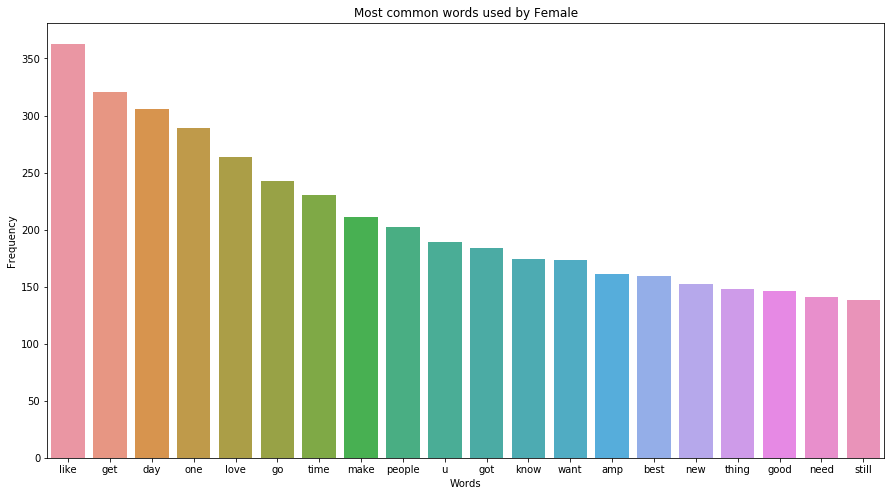

In [49]:
#plotting 20 most common female words along with frequency
plt.figure(figsize=(15,8))
sb.barplot(x=top20_words_female,y=top20_count_female)
plt.title("Most common words used by Female")
plt.ylabel("Frequency")
plt.xlabel("Words")


In [50]:
# 20 most common words used by male
male_word_counts=wordcounts(male_data)
male_word_counts

[('like', 636),
 ('get', 598),
 ('one', 503),
 ('day', 464),
 ('time', 434),
 ('love', 421),
 ('go', 421),
 ('make', 358),
 ('people', 355),
 ('u', 340),
 ('got', 329),
 ('new', 319),
 ('know', 319),
 ('good', 289),
 ('want', 284),
 ('best', 282),
 ('amp', 276),
 ('back', 267),
 ('need', 261),
 ('see', 256)]

In [51]:
top20_words_male=[male_word_counts[i][0] for i in range(20)]
top20_count_male=[male_word_counts[i][1] for i in range(20)]

Text(0.5, 0, 'Words')

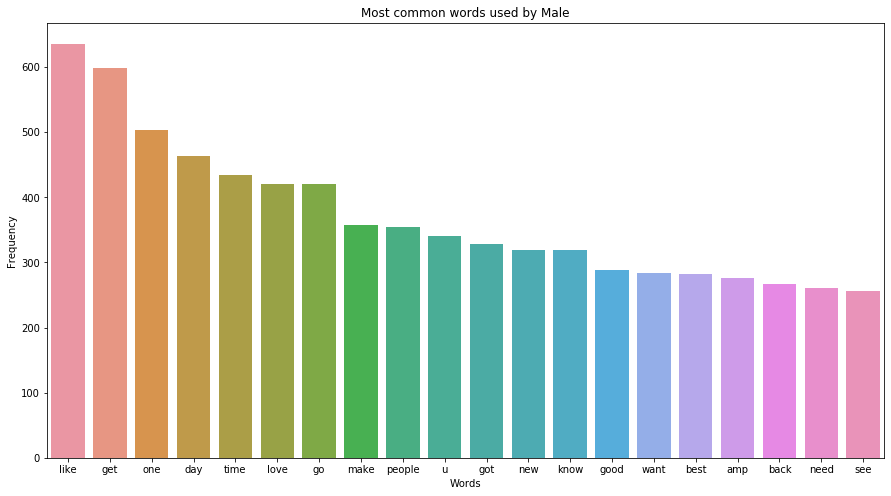

In [52]:
#plotting 20 most common male words along with frequency
plt.figure(figsize=(15,8))
sb.barplot(x=top20_words_male,y=top20_count_male)
plt.title("Most common words used by Male")
plt.ylabel("Frequency")
plt.xlabel("Words")


In [53]:
from wordcloud import WordCloud, ImageColorGenerator #To generate word cloud


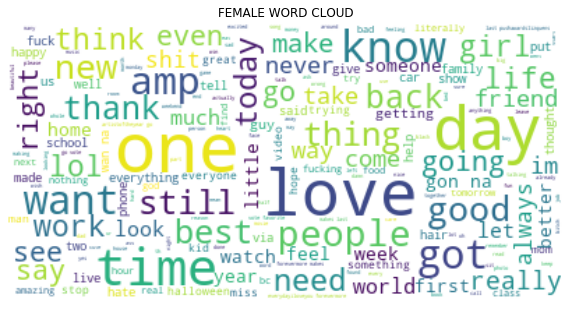

In [54]:
#Generating word clouds
#For female words
total_text_female = " ".join(lem.lemmatize(word) for word in female_data.clean_text)
plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=50,stopwords=None,relative_scaling=1, max_words=200, background_color="white").generate(total_text_female)
plt.title("FEMALE WORD CLOUD")
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

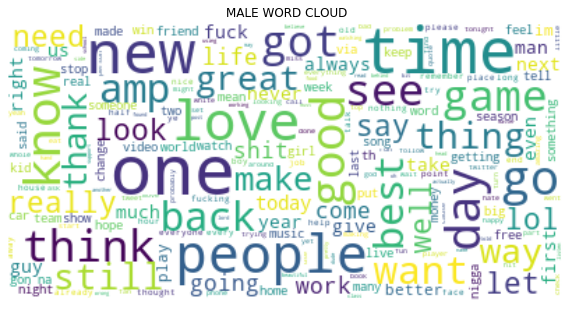

In [55]:
#For male words
total_text_male = " ".join(lem.lemmatize(word) for word in male_data.clean_text)
plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=50,stopwords=None,relative_scaling=1,max_words=200, background_color="white").generate(total_text_male)
plt.title("MALE WORD CLOUD")
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [56]:
#Creating New column by concatenating the "clean_description" and "clean_text" columns
twitter_data["Total_text_info"]=twitter_data["clean_text"].str.cat(twitter_data["clean_description"], sep=" ")

In [57]:
twitter_data.head()

,text,description,gender,clean_text,clean_description,Total_text_info
0,Robbie E Responds To Critics After Win Against...,i sing my own rhythm.,male,robbie e responds critics win eddie edwards wo...,sing rhythm,robbie e responds critics win eddie edwards wo...
1,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...,male,felt like friends living story retired ian,author novels filled family drama romance,felt like friends living story retired ian aut...
3,Hi @JordanSpieth - Looking at the url - do you...,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",male,hi jordanspieth looking url use ifttt typicall...,mobile guy ers shazam google kleiner perkins y...,hi jordanspieth looking url use ifttt typicall...
4,Watching Neighbours on Sky+ catching up with t...,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,female,watching neighbours sky catching neighbs xxx xxx,ricky wilson best frontman kaiser chiefs best ...,watching neighbours sky catching neighbs xxx x...
5,"Ive seen people on the train with lamps, chair...",you don't know me.,female,ive seen people train lamps chairs tvs etc,know,ive seen people train lamps chairs tvs etc know


In [58]:
twitter_data["Total_text_info"].values[47]

'camerons side bed smells bad like sleep'

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer() #to vectorize text data


In [60]:
 #Vectorize "Total_text_info"     #independent variable    
X=cv.fit_transform(twitter_data["Total_text_info"])

In [61]:
#"gender" is the dependent variable
y=twitter_data["gender"]

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=23) #Splitting into train and test sets
from sklearn.metrics import accuracy_score  #For Checking Accuracy

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10353, 39801), (3451, 39801), (10353,), (3451,))

## Building Models

In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### MultinomialNB

In [65]:
#Checking accuracy for different alpha values
alpha=[0.01,0.05,0.03,0.1,0.3,0.5,0.6,0.7,0.8,0.9,1]
mb_accuracy={}
for i in alpha:
    mb=MultinomialNB(alpha=i,fit_prior=True)
    mb.fit(X_train,y_train)
    ypred=mb.predict(X_test)
    mb_accuracy[i]=accuracy_score(y_test,ypred)
mb_accuracy=sorted(mb_accuracy.items(),key=lambda x:x[1],reverse=True) #Sorting accuracy in descending order

In [66]:
mb_accuracy

[(1, 0.6702405099971023),
 (0.8, 0.6682121124311794),
 (0.9, 0.6670530281077949),
 (0.7, 0.6661837148652564),
 (0.6, 0.6647348594610258),
 (0.5, 0.6638655462184874),
 (0.3, 0.6574905824398725),
 (0.1, 0.6514053897421037),
 (0.05, 0.6479281367719502),
 (0.03, 0.645320197044335),
 (0.01, 0.6363372935381049)]

In [67]:
#Training with best model
mb=MultinomialNB(alpha=1,fit_prior=True)
mb.fit(X_train,y_train)
ypred=mb.predict(X_test)
mb_accuracy_final=accuracy_score(y_test,ypred)

### Logistic Regression

In [68]:
#Checking accuracy for different c values
c=[0.01,0.03,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
lg_accuracy={}
for i in c:
    lg=LogisticRegression(multi_class="ovr",C=i,max_iter=200,random_state=23)
    lg.fit(X_train,y_train)
    ypred=lg.predict(X_test)
    lg_accuracy[i]=accuracy_score(y_test,ypred)
lg_accuracy=sorted(lg_accuracy.items(),key=lambda x:x[1],reverse=True) #Sorting accuracy in descending order

In [69]:
lg_accuracy

[(0.1, 0.6548826427122573),
 (1, 0.6548826427122573),
 (0.2, 0.6545928716314112),
 (0.7, 0.6540133294697189),
 (0.8, 0.6531440162271805),
 (0.6, 0.6528542451463344),
 (0.9, 0.6528542451463344),
 (0.3, 0.6516951608229499),
 (0.5, 0.6516951608229499),
 (0.4, 0.6508258475804115),
 (0.05, 0.6485076789336425),
 (0.03, 0.6441611127209504),
 (0.01, 0.6117067516661837)]

In [70]:
#Training with best model
lg=LogisticRegression(multi_class="ovr",C=.1,max_iter=200,random_state=23)
lg.fit(X_train,y_train)
ypred=lg.predict(X_test)
lg_accuracy_final=accuracy_score(y_test,ypred)

### Support Vector Machine

In [71]:
#Checking Accuracy for different C values
C=[1,2,3,4,5]
svm_accuracy={}
for i in C:
    svc=SVC(C=i,random_state=23)
    svc.fit(X_train,y_train)
    ypred=svc.predict(X_test)
    svm_accuracy[i]=accuracy_score(y_test,ypred)
svm_accuracy=sorted(svm_accuracy.items(),key=lambda x:x[1],reverse=True) #Sorting accuracy in descending order

In [72]:
svm_accuracy

[(2, 0.6627064618951028),
 (3, 0.6566212691973341),
 (4, 0.6557519559547957),
 (5, 0.6540133294697189),
 (1, 0.649956534337873)]

In [73]:
#Training with best model
svc=SVC(C=2,random_state=23)
svc.fit(X_train,y_train)
ypred=svc.predict(X_test)
svm_accuracy_final=accuracy_score(y_test,ypred)

In [74]:
#Comparison of accuracy of the models

In [75]:
import numpy as np

Text(0.5, 1.0, 'Comparison Of The Models')

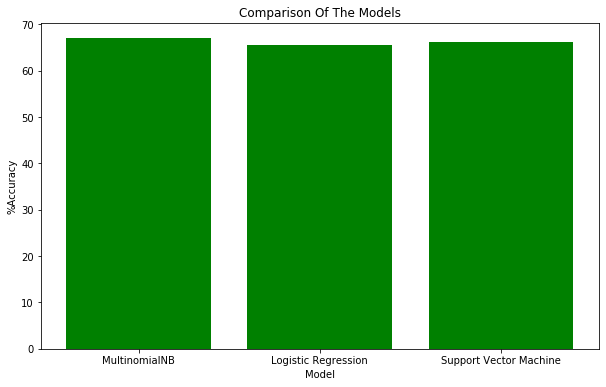

In [76]:
Models=["MultinomialNB","Logistic Regression","Support Vector Machine"]
Accuracy=[mb_accuracy_final*100, lg_accuracy_final*100,svm_accuracy_final*100]
xpos=np.arange(0,3)
plt.figure(figsize=(10,6))
plt.bar(xpos,Accuracy,color="green")
plt.xticks(xpos,Models)
plt.xlabel("Model")
plt.ylabel("%Accuracy")
plt.title("Comparison Of The Models")


In [77]:
print(" Accuracy for MultinomialNB={:.2f}%".format(Accuracy[0]))
print(" Accuracy for Logistic Regression={:.2f}%".format(Accuracy[1]))
print(" Accuracy for Support Vector Machine={:.2f}%".format(Accuracy[2]))

 Accuracy for MultinomialNB=67.02%
 Accuracy for Logistic Regression=65.49%
 Accuracy for Support Vector Machine=66.27%


### MultinomialNB model suits best for the given problem

## Building Ensemble Model

In [78]:
from sklearn.ensemble import VotingClassifier
ensem_model=VotingClassifier(estimators=[('logistic reg', lg),("SVM",svc),("multinomial",mb)], voting='hard') 
ensem_model.fit(X_train,y_train)
ypred=ensem_model.predict(X_test)
Ensemble_accuracy=accuracy_score(y_test,ypred)

In [79]:

print("Ensemble Model Accuracy is {:.2f}%".format(Ensemble_accuracy*100))

Ensemble Model Accuracy is 66.91%


In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [81]:
print("Confusion Matrix\n",confusion_matrix(y_test,ypred))

Confusion Matrix
 [[ 686  133  135]
 [  62 1035  240]
 [ 109  463  588]]


In [82]:
print("Classification Report\n",classification_report(y_test,ypred))

Classification Report
               precision    recall  f1-score   support

       brand       0.80      0.72      0.76       954
      female       0.63      0.77      0.70      1337
        male       0.61      0.51      0.55      1160

    accuracy                           0.67      3451
   macro avg       0.68      0.67      0.67      3451
weighted avg       0.67      0.67      0.67      3451

